# Formative Assignment: Advanced Linear Algebra (PCA)

This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.


### Step 1: Load and Standardize the Data

Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

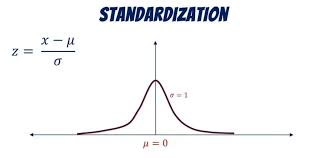


## mathias Kabango


In [1]:
#  import numpy and
import numpy as np
import pandas as pd

In [2]:
# Step 1: Load and Standardize the data (use of numpy only allowed)
data = pd.read_csv("SouthAfricaCrimeStats.csv")

standardized_data = None  # Do not use sklearn (Data - Data Mean)/ Data's Standard Deviation
# standardized_data[:5] # Display the first few rows of standardized data
province_list = data['Province'].unique().tolist()
station_list = data['Station'].unique().tolist()
category_list = data['Category'].unique().tolist()

category_list


['All theft not mentioned elsewhere',
 'Theft out of or from motor vehicle',
 'Drug-related crime',
 'Robbery with aggravating circumstances',
 'Common assault',
 'Commercial crime',
 'Burglary at residential premises',
 'Assault with the intent to inflict grievous bodily harm',
 'Theft of motor vehicle and motorcycle',
 'Shoplifting',
 'Malicious damage to property',
 'Common robbery',
 'Burglary at non-residential premises',
 'Sexual Offences',
 'Driving under the influence of alcohol or drugs',
 'Stock-theft',
 'Attempted murder',
 'Carjacking',
 'Robbery at non-residential premises',
 'Robbery at residential premises',
 'Murder',
 'Illegal possession of firearms and ammunition',
 'Arson',
 'Truck hijacking',
 'Robbery of cash in transit',
 'Bank robbery',
 'Sexual offences as result of police action']

In [3]:
# reusable function to help with encoding categorical columns e.g Category, Station and Province
def encoder(array):
    encoded = {}
    for indx,val in enumerate(array):
        encoded[val] = indx
    return encoded
lets_see = encoder(category_list)
lets_see

{'All theft not mentioned elsewhere': 0,
 'Theft out of or from motor vehicle': 1,
 'Drug-related crime': 2,
 'Robbery with aggravating circumstances': 3,
 'Common assault': 4,
 'Commercial crime': 5,
 'Burglary at residential premises': 6,
 'Assault with the intent to inflict grievous bodily harm': 7,
 'Theft of motor vehicle and motorcycle': 8,
 'Shoplifting': 9,
 'Malicious damage to property': 10,
 'Common robbery': 11,
 'Burglary at non-residential premises': 12,
 'Sexual Offences': 13,
 'Driving under the influence of alcohol or drugs': 14,
 'Stock-theft': 15,
 'Attempted murder': 16,
 'Carjacking': 17,
 'Robbery at non-residential premises': 18,
 'Robbery at residential premises': 19,
 'Murder': 20,
 'Illegal possession of firearms and ammunition': 21,
 'Arson': 22,
 'Truck hijacking': 23,
 'Robbery of cash in transit': 24,
 'Bank robbery': 25,
 'Sexual offences as result of police action': 26}

In [4]:
# use map function to map the encoded columns back to the original dataset
data['Province'] = data['Province'].map(encoder(province_list))
data['Station'] = data['Station'].map(encoder(station_list))
data['Category'] = data['Category'].map(encoder(category_list))
data.head()

,Province,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
0,0,0,0,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176
1,1,1,0,6093,4602,3761,3610,3267,3037,2886,2638,2809,3050,2434
2,0,2,0,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635
3,2,3,0,5108,4282,3834,3316,3101,3013,2679,3116,2927,2297,2103
4,1,4,0,5099,4536,3309,2694,2616,2606,2635,3226,3246,2892,3030


In [5]:
standardized_data = (data - np.mean(data, axis=0)) / np.std(data) # Do not use sklearn (Data - Data Mean)/ Data's Standard Deviation
standardized_data[:5] # Display the first few rows of standardized data

/Users/mizeroreine/Desktop/docs/ALU/ADVANCED-LINEAR-ALGEBRA-PCA-/.venv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:4062: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


,Province,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
0,-1.506672,-1.730536,-1.669046,32.223100,31.669738,31.585592,27.345308,26.496895,27.818936,28.455232,31.747836,29.465006,28.448893,28.463612
1,-1.113492,-1.727505,-1.669046,29.308093,22.888436,19.778836,18.919849,17.236020,16.326765,15.369647,13.897015,14.590158,16.098613,13.176012
2,-1.506672,-1.724475,-1.669046,25.648519,30.417430,33.459680,35.979132,32.156917,31.305078,32.944368,29.458992,26.134021,21.465715,19.872003
3,-0.720313,-1.721444,-1.669046,24.514634,21.272556,20.169717,17.349092,16.341198,16.194797,14.240545,16.483463,15.219048,12.028696,11.330573
4,-1.113492,-1.718413,-1.669046,24.470836,22.555161,17.358585,14.025924,13.726806,13.956848,14.000542,17.078671,16.919183,15.244633,16.498919


### Step 3: Calculate the Covariance Matrix

The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.


In [6]:
# Step 3: Calculate the Covariance Matrix
cov_matrix = np.cov(standardized_data,rowvar=False)  # Calculate covariance matrix
cov_matrix

array([[ 1.00003240e+00,  3.43387590e-01, -5.84827786e-17,
        -1.46397114e-01, -1.54463023e-01, -1.63266451e-01,
        -1.68429039e-01, -1.74440022e-01, -1.76095311e-01,
        -1.70941930e-01, -1.76859895e-01, -1.85766281e-01,
        -1.90634361e-01, -1.92421784e-01],
       [ 3.43387590e-01,  1.00003240e+00,  7.36790912e-18,
        -3.61250013e-01, -3.66126971e-01, -3.70574077e-01,
        -3.75032187e-01, -3.79884333e-01, -3.73825659e-01,
        -3.64383854e-01, -3.58871618e-01, -3.56035114e-01,
        -3.52344061e-01, -3.54479468e-01],
       [-5.84827786e-17,  7.36790912e-18,  1.00003240e+00,
        -3.19201473e-01, -3.20287940e-01, -3.23445046e-01,
        -3.25523824e-01, -3.30163197e-01, -3.33654171e-01,
        -3.38084953e-01, -3.42072217e-01, -3.51082429e-01,
        -3.55371768e-01, -3.57497342e-01],
       [-1.46397114e-01, -3.61250013e-01, -3.19201473e-01,
         1.00003240e+00,  9.82007413e-01,  9.60058944e-01,
         9.39060580e-01,  9.24685568e-01,  9.

## Orpheus Manga


### Step 4: Perform Eigendecomposition

Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.


In [13]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix) # Perform eigendecomposition
eigenvalues, eigenvectors

(array([1.05129128e+01, 1.23484606e+00, 8.43299107e-01, 6.12513685e-01,
        4.67669306e-01, 1.38669087e-01, 5.89034767e-02, 3.79345348e-02,
        2.72342428e-02, 1.88928878e-02, 1.59854157e-02, 9.38954843e-03,
        1.08507243e-02, 1.13528278e-02]),
 array([[-6.37852380e-02, -6.94933564e-01, -4.69105406e-01,
         -5.15359713e-01, -1.64379860e-01,  9.86098940e-04,
          1.75276679e-02, -1.41570971e-03, -6.76254066e-04,
          7.43461908e-04,  3.00283432e-03, -5.24991875e-04,
          1.38062997e-03,  3.54665877e-04],
        [-1.27353929e-01, -6.06869644e-01,  2.22757467e-02,
          7.73975607e-01,  1.25763409e-01,  2.15691468e-03,
          7.76636990e-03, -6.14324740e-03, -4.04469303e-03,
         -3.49095602e-03, -6.75695795e-04,  6.68601587e-04,
         -2.66824246e-03,  2.25454834e-04],
        [-1.15149509e-01,  3.77101838e-01, -8.56896101e-01,
          3.16714644e-01, -9.58073798e-02,  2.45411241e-02,
          1.06729648e-02, -6.72922002e-03, -1.85176341

### Step 5: Sort Principal Components

Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>


In [14]:
# Step 5: Sort Principal Components
sorted_indices = eigenvalues.argsort()[::-1]  # Sort eigenvalues in descending order
sorted_eigenvectors = eigenvectors[:, sorted_indices]  # Sort eigenvectors accordingly
sorted_eigenvectors

array([[-6.37852380e-02, -6.94933564e-01, -4.69105406e-01,
        -5.15359713e-01, -1.64379860e-01,  9.86098940e-04,
         1.75276679e-02, -1.41570971e-03, -6.76254066e-04,
         7.43461908e-04,  3.00283432e-03,  3.54665877e-04,
         1.38062997e-03, -5.24991875e-04],
       [-1.27353929e-01, -6.06869644e-01,  2.22757467e-02,
         7.73975607e-01,  1.25763409e-01,  2.15691468e-03,
         7.76636990e-03, -6.14324740e-03, -4.04469303e-03,
        -3.49095602e-03, -6.75695795e-04,  2.25454834e-04,
        -2.66824246e-03,  6.68601587e-04],
       [-1.15149509e-01,  3.77101838e-01, -8.56896101e-01,
         3.16714644e-01, -9.58073798e-02,  2.45411241e-02,
         1.06729648e-02, -6.72922002e-03, -1.85176341e-03,
        -1.98971337e-03, -2.03016966e-03,  1.85057408e-03,
        -3.54436852e-04,  3.54655764e-04],
       [ 2.89788928e-01, -3.20466459e-02, -9.46553847e-02,
        -3.58030974e-02,  3.63989640e-01,  4.47744907e-01,
        -3.90374866e-01, -2.55850890e-01, -3.

## Reine Mizero


### Step 6: Project Data onto Principal Components

Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.


In [8]:
# Step 6: Project Data onto Principal Components
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, sorted_indices]
eigenvalues = eigenvalues[sorted_indices]
num_components = 2
top_eigenvectors = eigenvectors[:, :num_components]  # Decide on the number of principal components to keep
reduced_data = np.dot(standardized_data, top_eigenvectors)
reduced_data[:5]

array([[-96.41815467,  -6.38125625],
       [-58.96957578,  -3.65966029],
       [-95.18438424,  -6.17238081],
       [-55.31303362,  -3.62618568],
       [-55.45900558,  -3.3958355 ]])

### Step 7: Output the Reduced Data

Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.


In [9]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]  # Display the first few rows of reduced data

Reduced Data Shape: (30861, 2)


array([[-96.41815467,  -6.38125625],
       [-58.96957578,  -3.65966029],
       [-95.18438424,  -6.17238081],
       [-55.31303362,  -3.62618568],
       [-55.45900558,  -3.3958355 ]])

## Together


### Step 8: Visualize Before and After PCA

Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.


In [ ]:
# Step 8: Visualize Before and After PCA


# Plot original data (first two features for simplicity)


# Plot reduced data after PCA
